In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
v_{c}^{2} = \frac{4G\Sigma_{g}R_{d}}{\pi} y^{2}\int_{0}^{\pi/2}(\cos(2u) + 1)du\int_{0}^{\infty}d\beta exp(-y\cos u\cosh\beta -\frac{R_{m}}{2*R_{d}y\cos u \cosh\beta})(\frac{R_{m}}{2R_{d}y^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}\pi}{4G\Sigma_{g}R_{d}} =  y^{2}\int_{0}^{\pi/2}(\cos(2u) + 1)du\int_{0}^{\infty}d\beta exp(-y\cos u\cosh\beta -\frac{R_{m}}{2*R_{d}y\cos u \cosh\beta})(\frac{R_{m}}{2R_{d}y^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$

donde $y = \frac{R}{2R_{d}}$, por lo que $v_{c}^{2}(R)$ es 
$$\begin{equation}
v_{c}^{2} = \frac{G\Sigma_{g}R^{2}}{\pi R_{d}}\int_{0}^{\pi/2}(\cos2u + 1)du\int_{0}^{\infty} d\beta exp(-\frac{R\cos u \cosh\beta}{2R_{d}} -\frac{R_{m}}{R\cos u \cosh\beta})(\frac{2R_{m}R_{d}}{R^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}\pi R_{d}}{G\Sigma_{g}} = R^{2}\int_{0}^{\pi/2}(\cos2u + 1)du\int_{0}^{\infty} d\beta exp(-\frac{R\cos u \cosh\beta}{2R_{d}} -\frac{R_{m}}{R\cos u \cosh\beta})(\frac{2R_{m}R_{d}}{R^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$

In [2]:
def func(u,beta,y,R_m=4.0e03,R_d=2.0e03):
    exp = np.exp(-y*np.cos(u)*np.cosh(beta) - R_m/(2.*R_d*y*np.cos(u)*np.cosh(beta)))
    t1 = R_m/(2.*R_d*y**2.*np.cos(u)**2.*np.cosh(beta)**2.) -1.
    t2 = np.cos(2.*u) + 1.
    f = t1*t2*exp
    return f

In [3]:
def Vc2_ISMy_I(l):
    Integral_ISM = []
    for i in range (0,len(l)):
        integrando = lambda beta,u: func(u,beta,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
        Integral_ISM.append(result)
    return np.array(l**2.*Integral_ISM)

In [4]:
y = np.linspace(0.1,15.,100)
print Vc2_ISMy_I(y)

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


[ 1.07602985e+44  9.47566528e+16  1.92742107e+10  1.86478014e+07
  3.73055873e+05  3.39441813e+04  2.32253175e+38  1.24955583e+33
  1.11483297e+29  1.90497597e+63  1.22067205e+57  9.05728558e+51
  4.35489051e+47  9.00010617e+43  5.93153044e+40  9.98178185e+37
  3.62262044e+35  2.48815894e+33  3.00392864e+12  5.64710377e+11
  1.46604937e+28  3.18222769e+10  9.15262282e+09  2.92689473e+09
  1.02638999e+09  3.89214426e+08  1.56516791e+08  6.40012701e+07
  2.32189453e+07  2.07416086e+06 -1.22205700e+07 -2.55574508e+07
 -4.14550765e+07 -6.29173291e+07 -9.33915366e+07 -1.37480973e+08
 -2.01702957e+08 -2.95473945e+08 -4.32492364e+08 -6.32730159e+08
 -9.25324554e+08 -1.35278762e+09 -1.97713857e+09 -2.88886133e+09
 -4.21982070e+09 -6.16238048e+09 -8.99689682e+09 -1.31319512e+10
 -1.91628757e+10 -2.79569409e+10 -7.44546181e+10 -9.90439126e+10
 -1.49120718e+11 -2.11939301e+11 -3.09869705e+12 -1.18948357e+13
 -6.64418695e+12 -9.72764133e+12 -5.93619196e+14 -8.11468903e+14
 -3.05313162e+13 -1.51654

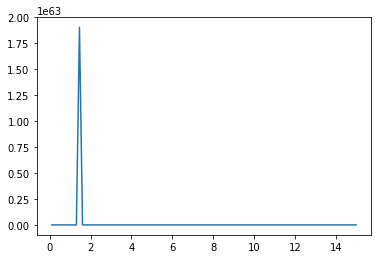

In [6]:
plt.plot(y,Vc2_ISMy_I(y))

In [7]:
R = np.linspace(0.1,15.,100)

In [8]:
def func_R_I(u,beta,R,R_m=4.0e03,R_d=2.0e03):
    exp1 = np.exp(-(R*np.cos(u)*np.cosh(beta))/(2.*R_d))
    exp2 = np.exp(-R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return exp1*t1*t2*exp2

In [13]:
fun = []
t = np.pi/2.-0.1
for i in range (0,len(R)):
    integ = lambda beta,u: func_R_I(u,beta,R[i])
    resul = integrate.dblquad(integ,0.1,1.,lambda u: 0.1, lambda u: np.pi/2.)[0]
    fun.append(resul)
print fun

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0568492075e-314, 1.4142179962760307e-294, 7.250071379847032e-277, 3.6652162097415117e-261, 3.8403949966478514e-247, 1.5070221813507322e-234, 3.568814088228448e-223, 7.525084027223341e-213, 1.946160717701542e-203, 8.055646855730851e-195, 6.669582721936614e-187, 1.3332084381915845e-179, 7.550190332051986e-173, 1.3889609087544193e-166, 9.337104289821994e-161, 2.53949218397235e-155, 3.053134768131449e-150, 1.75308343562939e-145, 5.1451146991643535e-141, 8.194046186149756e-137, 7.466031604052334e-133, 4.079144884359527e-129, 1.3935108957127643e-125, 3.089992001628662e-122, 4.5991053511997024e-119, 4.735359786005278e-116, 3.465794269120252e-113, 1.8479739491716304e-110, 7.340145314316806e-108, 2.2162342892053843e-105, 5.181177764153683e-103, 9.537664770591467e-101, 1.403878970962934e-98, 1.6757324019228904e-96, 1.6431526981727266e-94, 1.3393942836251681e-92, 9.175884459951438e-91, 5.336791786002095e-89, 2.65984488852950

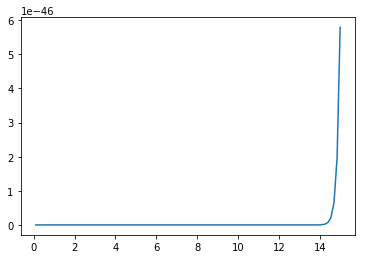

In [15]:
plt.plot(R,fun)

In [16]:
def func_R_I_(u,beta,R,R_m=4.0e03,R_d=2.0e03):
    exp1 = np.exp(-(R*np.cos(u)*np.cosh(beta))/(2.*R_d))
    exp2 = np.exp(-R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return exp1*t1*t2#*exp2

In [19]:
fun_2 = []
t = np.pi/2.-0.1
for i in range (0,len(R)):
    integ = lambda beta,u: func_R_I_(u,beta,R[i])
    resul = integrate.dblquad(integ,0.1,np.inf,lambda u: 0.1, lambda u: t)[0]
    fun_2.append(resul)
print fun_2

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[-2186850916.4700184, -258945802.6502947, -66108448.64160575, 963275980392830.9, 594497365716446.5, 403104991844584.44, 291197804933790.5, 13121523.15377, 13570959.761651114, 13562945.573093839, 13319080.130758844, 12955817.223128326, 12536627.887918089, 12096845.003295694, 11656293.918597689, 11226017.090117907, 10811944.726956908, 10417002.230268003, 10042336.483848266, 9688046.019331357, 9353622.3275398, 9038219.399011074, 8740819.1495004, 8460332.812537149, 8195662.487293416, 7945737.687983932, 7709536.139270256, 7486094.638868811, 7274513.692128321, 7073958.2893968895, 6883656.351506108, 6702895.826046057, 6531021.063795908, 6367428.879432196, 6211564.54767986, 6062917.890439552, 5921019.545624303, 5785437.466931259, 5655773.676790626, 5531661.27774319, 5412761.7168428255, 5298762.291348973, 5189373.880633281, 5084328.887486702, 4983379.371739182, 4886295.359305676, 4792863.310605944, 4702884.7332656495, 4616174.92524482, 4532561.835538503, 4451885.03092779, 4373994.758182213, 429

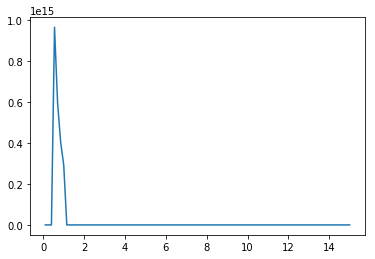

In [10]:
plt.plot(R,fun)

In [20]:
#Probar con el integrando con def function en vez de lambda